## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):   
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

W0715 23:02:48.248937  7480 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0715 23:02:48.249261  7480 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 23:02:48.279134  7480 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 23:02:48.279810  7480 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0715 23:02:48.537717  7480 deprecation.py:323] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.1220 - acc: 0.2180 - val_loss: 1.9828 - val_acc: 0.2647
Epoch 2/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.8913 - acc: 0.2927 - val_loss: 1.9057 - val_acc: 0.2635
Epoch 3/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.8420 - acc: 0.3194 - val_loss: 1.7919 - val_acc: 0.3414
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.7887 - acc: 0.3490 - val_loss: 1.9082 - val_acc: 0.3028
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.7831 - acc: 0.3590 - val_loss: 1.7744 - val_acc: 0.3607
Epoch 6/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.7430 - acc: 0.3773 - val_loss: 1.9738 - val_acc: 0.3291
Epoch 7/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7382 - acc: 0.3815 - val_loss: 1.

50000/50000 [==============================] - 10s 209us/step - loss: 1.8421 - acc: 0.3401 - val_loss: 1.7000 - val_acc: 0.3984
Epoch 2/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6022 - acc: 0.4295 - val_loss: 1.5343 - val_acc: 0.45821.6046 - 
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5134 - acc: 0.4606 - val_loss: 1.5195 - val_acc: 0.4570
Epoch 4/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4502 - acc: 0.4824 - val_loss: 1.4911 - val_acc: 0.4744
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4028 - acc: 0.5022 - val_loss: 1.4893 - val_acc: 0.4714
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.3570 - acc: 0.5175 - val_loss: 1.4012 - val_acc: 0.5037
Epoch 7/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.3181 - acc: 0.5333 - val_loss: 1.4241 - val_acc: 0.5026
Epoch 8/50
50000/50000 [=====

Epoch 2/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.8167 - acc: 0.3634 - val_loss: 1.7594 - val_acc: 0.3845
Epoch 3/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7288 - acc: 0.3943 - val_loss: 1.6972 - val_acc: 0.4077
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6691 - acc: 0.4165 - val_loss: 1.6475 - val_acc: 0.4254
Epoch 5/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.6224 - acc: 0.4321 - val_loss: 1.6035 - val_acc: 0.4416
Epoch 6/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5811 - acc: 0.4469 - val_loss: 1.5710 - val_acc: 0.4502
Epoch 7/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5458 - acc: 0.4599 - val_loss: 1.5435 - val_acc: 0.4554
Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5157 - acc: 0.4685 - val_loss: 1.5232 - val_acc: 0.4614
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 10s 210us/step - loss: 2.0385 - acc: 0.2903 - val_loss: 2.0129 - val_acc: 0.2905
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9865 - acc: 0.3084 - val_loss: 1.9691 - val_acc: 0.3072
Epoch 5/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.9472 - acc: 0.3233 - val_loss: 1.9346 - val_acc: 0.3214
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9157 - acc: 0.3328 - val_loss: 1.9059 - val_acc: 0.3330
Epoch 7/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.8896 - acc: 0.3416 - val_loss: 1.8825 - val_acc: 0.3378
Epoch 8/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.8676 - acc: 0.3497 - val_loss: 1.8635 - val_acc: 0.3451
Epoch 9/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.8489 - acc: 0.3556 - val_loss: 1.8461 - val_acc: 0.3519
Epoch 10/50
50000/50000 [==

50000/50000 [==============================] - 10s 202us/step - loss: 2.2462 - acc: 0.1742 - val_loss: 2.2366 - val_acc: 0.1859
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 2.2263 - acc: 0.1948 - val_loss: 2.2184 - val_acc: 0.2061
Epoch 5/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.2090 - acc: 0.2099 - val_loss: 2.2021 - val_acc: 0.2192
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 2.1936 - acc: 0.2202 - val_loss: 2.1877 - val_acc: 0.2272
Epoch 7/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.1799 - acc: 0.2280 - val_loss: 2.1746 - val_acc: 0.2359
Epoch 8/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.1674 - acc: 0.2356 - val_loss: 2.1626 - val_acc: 0.2410
Epoch 9/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.1558 - acc: 0.2403 - val_loss: 2.1514 - val_acc: 0.2468
Epoch 10/50
50000/50000 [=============

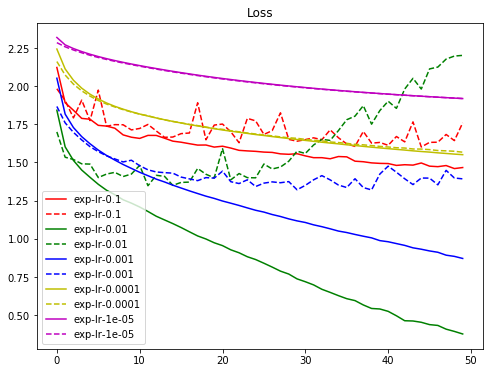

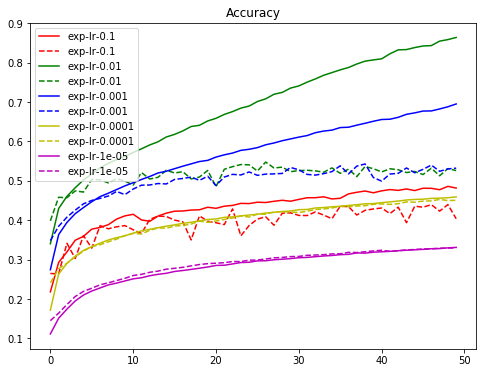

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()